# 1. Lý thuyết

1)  Đặc diểm của kiến trúc RNN là gì ?

A. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo tuần tự thời gian và output của các step trong tương lai được sử dụng như input của step hiện tại.

B. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện một cách song song và output của các step trước được sử dụng như input của step hiện tại.

C. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo tuần tự thời gian và output của các step trước được sử dụng như input của step hiện tại.

D. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo chiều từ phải sang trái cho tới khi trở về vị trí đầu tiên.

***Đáp án: C.***

2) Nhận định nào sau đây là đúng về RNN?

A. Kiến trúc RNN dự báo song song các output một lúc.

B. Kiến trúc RNN không chia sẻ tham số giữa các units. Do đó kích thước mạng sẽ gia tăng theo độ dài văn bản.

C. Kiến trúc RNN có thể tổng hợp được thông tin trong tương lai để dự báo hiện tại.

D. Kiến trúc RNN chia sẻ tham số trên toàn bộ các units nên số lượng tham số không phụ thuộc vào độ dài văn bản.

***Đáp án: D.***

3) Để huấn luyện mạng RNN thì một chú ý quan trọng tại time step t=0 chúng ta cần làm gì ?

A. Mã hóa từ đầu vào thành một ma trận đại số.

B. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị phân phối xác suất của biến mục tiêu.

C. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị có tác dụng mã hóa biểu diễn cho từ đầu vào tại bước $t=0$.

D. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị có tác dụng kích hoạt tính toán.

***Đáp án: D.***

4) Sự khác biệt giữa RNN và CNN là gì?

A. RNN là kiến trúc truy hồi có thể trả ra kết quả dự báo ở nhiều timestep. CNN không có khả năng truy hồi để dự báo theo timestep

B. RNN có tính truy hồi và kiến trúc không chia sẻ tham số giữa các units. Trong khi CNN chia sẻ tham số ở phân phối xác suất đầu ra. 

C. RNN có số lượng tham số thay đổi theo độ dài văn bản. Trong khi đó CNN luôn có số lượng tham số xác định trước.

D. RNN có thể dự báo theo một chiều trong khi CNN chỉ dự báo được theo hai chiều.

***Đáp án: A.***

5) Véc tơ context trong kiến trúc LSTM và GRU có tác dụng gì ?

A. Là véc tơ biểu diễn của đầu vào $x_t$ tại mỗi bước.

B. Ghi nhận bối cảnh xuyên suốt toàn bộ chuỗi tính đến thời điểm hiện tại

C. Là véc tơ cập nhật và loại bỏ thông tin mới tại mỗi bước.

D. Kích hoạt thông tin tại mỗi timestep

***Đáp án: B.***



# 2. Thực hành


6. Từ bộ dữ liệu [Sentiment-analysis-on-movie-reviews](https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data) hãy sử dụng các thuật toán trong RNN để huấn luyện mô hình phân loại cảm xúc văn bản. (1 điểm)

7. Sử dụng mô hình LSTM để dự báo tổng số lượng khách hàng sử dụng dịch vụ hàng không [air- passengers](https://www.kaggle.com/datasets/rakannimer/air-passengers) (2 điểm)

8. Xây dựng một mô hình thêm dấu Tiếng Việt sử dụng LSTM. Cách xử lý để tạo bộ dữ liệu có thể tham khảo tại [them dau tieng viet](https://phamdinhkhanh.github.io/2020/05/28/TransformerThemDauTV.html#1-d%E1%BB%AF-li%E1%BB%87u). (2 điểm)



# 6. Sentiment-analysis-on-movie-reviews 

In [ ]:
!nvidia-smi

Sun Apr  3 16:58:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   27C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/MyDrive/Colab Notebooks/TowardDataScience/lesson10")

In [ ]:
!unzip sentiment-analysis-on-movie-reviews.zip

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: sampleSubmission.csv    
  inflating: test.tsv.zip            
  inflating: train.tsv.zip           


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/TowardDataScience/lesson10'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/TowardDataScience/lesson10/train.tsv
/content/drive/MyDrive/Colab Notebooks/TowardDataScience/lesson10/test.tsv
/content/drive/MyDrive/Colab Notebooks/TowardDataScience/lesson10/sampleSubmission.csv
/content/drive/MyDrive/Colab Notebooks/TowardDataScience/lesson10/10.LSTM_Homework_LeMinhHieu.ipynb


In [ ]:
!unzip train.tsv.zip
!unzip test.tsv.zip

Archive:  train.tsv.zip
  inflating: train.tsv               
Archive:  test.tsv.zip
  inflating: test.tsv                


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 5.2 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 596 kB 45.1 MB/s 
     |████████████████████████████████| 895 kB 44.1 MB/s 
     |████████████████████████████████| 6.5 MB 31.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast, TFAutoModel

# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

# And pandas for data import + sklearn because you allways need sklearn
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_table("train.tsv",sep='\t')
data=data[['Phrase','Sentiment']].copy()

In [ ]:
dff=[len(i.split(" ")) for i in data.Phrase[:10]]
max(dff)

37

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data.index.values, 
                                                  data.Sentiment.values, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=data.Sentiment)

data['data_type'] = ['not_set']*data.shape[0]

data.loc[X_train, 'data_type'] = 'train'
data.loc[X_val, 'data_type'] = 'val'

In [ ]:
# Name of the BERT model to use
model_name = 'bert-base-cased'

# Max length of tokens
max_length = max(dff)+3

# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [ ]:
# Build your model input
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
attention_mask = Input(shape=(max_length,), name='attention_mask', dtype='int32') 
inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

bert = TFAutoModel.from_pretrained('bert-base-cased')
embeddings = bert.bert(inputs)[1]  # access pooled activations with [1]

# convert bert embeddings into 5 output classes
x =Dense(1024, activation='relu')(embeddings)
y =Dense(5, activation='softmax', name='outputs')(x)

model = Model(inputs=inputs, outputs=y)
#model.layers[2].trainable = False

# Take a look at the model
model.summary()

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 40)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 40)]         0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['attention_mask[0][0]',         
                                thPoolingAndCrossAt               'input_ids[0][0]']              
                                tentions(last_hidde                                               
                                n_state=(None, 40,                                            

In [ ]:
y_senti = to_categorical(data[data.data_type=='train'].Sentiment)

# Tokenize the input 
x = tokenizer(
    text=data[data.data_type=='train'].Phrase.to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

train=tf.data.Dataset.from_tensor_slices((x['input_ids'], x['attention_mask'], y_senti))
def map_func(input_ids, masks, labels):
    # convert three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

train = train.map(map_func)
batch_size = 32

# shuffle and batch - dropping any remaining samples that don't cleanly
train = train.shuffle(100).batch(batch_size, drop_remainder=True)

In [ ]:
y_senti = to_categorical(data[data.data_type=='val'].Sentiment)

# Tokenize the input 
x = tokenizer(
    text=data[data.data_type=='val'].Phrase.to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

val = tf.data.Dataset.from_tensor_slices((x['input_ids'], x['attention_mask'], y_senti))
val = val.map(map_func)
val = val.shuffle(100).batch(batch_size, drop_remainder=True)

In [ ]:
optimizer = Adam(lr=1e-5, decay=1e-6)
loss = CategoricalCrossentropy()
acc = CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Fit the model
history = model.fit(
    train,
    validation_data=val,
    epochs=3)

Epoch 1/3
4145/4145 [==============================] - 2278s 547ms/step - loss: 0.8320 - accuracy: 0.6554 - val_loss: 0.7354 - val_accuracy: 0.6931
Epoch 2/3
4145/4145 [==============================] - 2262s 546ms/step - loss: 0.6848 - accuracy: 0.7148 - val_loss: 0.7278 - val_accuracy: 0.6935
Epoch 3/3
4145/4145 [==============================] - 2263s 546ms/step - loss: 0.6043 - accuracy: 0.7494 - val_loss: 0.7564 - val_accuracy: 0.6900


In [ ]:
model.save('sentiment_model')

# 7. air- passengers

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.models import Sequential

In [ ]:
data = pd.read_csv('AirPassengers.csv')
data.columns = ['Date', 'Passengers']
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


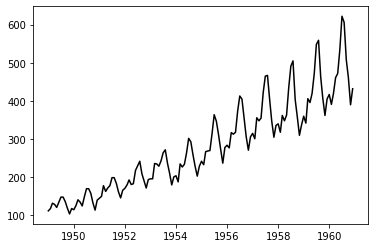

In [ ]:
plt.plot(data, color='black')
plt.show()

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler()
data['Passengers'] = scaler.fit_transform(data['Passengers'].values.reshape(-1,1))
data.head()

,Passengers
Date,
1949-01-01,0.015444
1949-02-01,0.027027
1949-03-01,0.054054
1949-04-01,0.048263
1949-05-01,0.032819


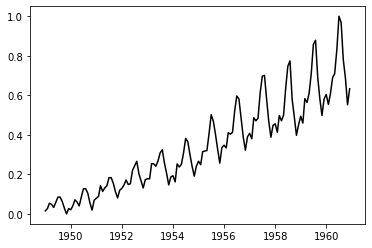

In [ ]:
plt.plot(data, color='black')
plt.show()

In [ ]:
def load_data(data, seq_len):
    x = []
    y = []
    for i in range(seq_len, len(data)):
        x.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
    return x, y

x, y = load_data(data, 20)

In [ ]:
num = int(len(data['Passengers'])*0.8)
num

115

In [ ]:
x_train, y_train = x[:num], y[:num]
x_test, y_test = x[num:], y[num:]

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_train = np.reshape(x_train, (num, 20, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 20, 1))

In [ ]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (115, 20, 1)
y_train.shape =  (115,)
x_test.shape =  (9, 20, 1)
y_test.shape =  (9,)


In [ ]:
lstmModel = Sequential()
lstmModel.add(LSTM(100, activation="ReLU", return_sequences=True, input_shape=(x_train.shape[1], 1)))
lstmModel.add(Dropout(0.2))
lstmModel.add(LSTM(80, activation="ReLU", return_sequences=True))
lstmModel.add(Dropout(0.2))
lstmModel.add(LSTM(50, activation="ReLU", return_sequences=True))
lstmModel.add(Dropout(0.2))
lstmModel.add(LSTM(30, activation="ReLU"))
lstmModel.add(Dense(1))
lstmModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 20, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 80)            57920     
                                                                 
 dropout_1 (Dropout)         (None, 20, 80)            0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 50)            26200     
                                                                 
 dropout_2 (Dropout)         (None, 20, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 30)                9

In [ ]:
lstmModel.compile(optimizer="adam", loss="MSE")
lstmModel.fit(x_train, y_train, epochs=15, batch_size=50)

Epoch 1/15
3/3 [==============================] - 6s 124ms/step - loss: 0.1649
Epoch 2/15
3/3 [==============================] - 0s 132ms/step - loss: 0.1501
Epoch 3/15
3/3 [==============================] - 0s 136ms/step - loss: 0.1315
Epoch 4/15
3/3 [==============================] - 0s 120ms/step - loss: 0.1070
Epoch 5/15
3/3 [==============================] - 0s 140ms/step - loss: 0.0707
Epoch 6/15
3/3 [==============================] - 0s 124ms/step - loss: 0.0288
Epoch 7/15
3/3 [==============================] - 0s 124ms/step - loss: 0.0300
Epoch 8/15
3/3 [==============================] - 0s 144ms/step - loss: 0.0208
Epoch 9/15
3/3 [==============================] - 0s 127ms/step - loss: 0.0179
Epoch 10/15
3/3 [==============================] - 0s 124ms/step - loss: 0.0217
Epoch 11/15
3/3 [==============================] - 0s 121ms/step - loss: 0.0188
Epoch 12/15
3/3 [==============================] - 0s 128ms/step - loss: 0.0138
Epoch 13/15
3/3 [==============================] 

In [ ]:
def plot_predictions(test, predicted, title, x):
    plt.figure(figsize=(16,4))
    plt.plot(x ,test, color='blue',label='Actual')
    plt.plot(x ,predicted, alpha=0.7, color='red',label='Predict')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.legend()
    plt.show()

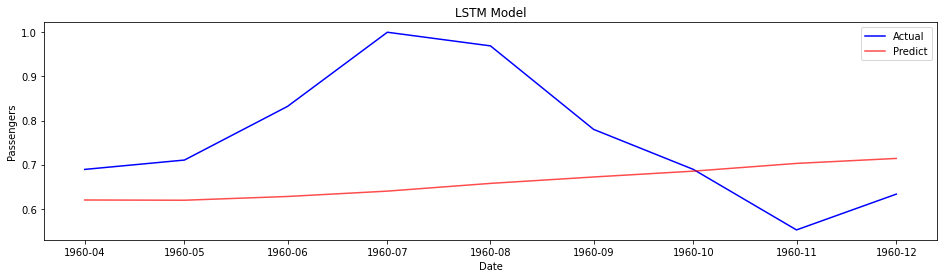

In [ ]:
lstmPredict = lstmModel.predict(x_test)
plot_predictions(y_test, lstmPredict, "LSTM Model", data.index[-9:])